In [1]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# https://pystan.readthedocs.io/en/latest/api.html
# http://tjo.hatenablog.com/entry/2014/05/01/190346

In [2]:
model="""
data {
  int<lower=0> N;
  int<lower=0> D;
  matrix[N,D] x;
  int<lower=0,upper=1> y[N];
}
parameters {
  real alpha;
  vector[D] beta;
  real r[N];
  real<lower=0> s;
}
model {
  for (n in 1:N)
    y[n] ~ bernoulli(inv_logit(alpha + x[n] * beta + r[n]));
  alpha ~ uniform(0, 1.0e+4);
  for (d in 1:D)
    beta[d] ~ normal(0, 1.0e+4);
  for (n in 1:N)
    r[n] ~ normal(0, 1/(s*s));
  s ~ uniform(0, 1.0e+4);
}
"""

# extract data from DB to DataFrame
- ここでDataFrameにデータ入れる
- user_id, c_i1, c_i2, c_i3,,,

In [3]:
datum = np.loadtxt("women.tsv", delimiter="\t", usecols=(1, 2), skiprows=1)
weights = np.transpose(datum)[0]
heights = np.transpose(datum)[1]
y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

In [4]:
datum.shape[1]

2

In [5]:
datum

array([[  58.,  115.],
       [  59.,  117.],
       [  60.,  120.],
       [  61.,  123.],
       [  62.,  126.],
       [  63.,  129.],
       [  64.,  132.],
       [  65.,  135.],
       [  66.,  139.],
       [  67.,  142.],
       [  68.,  146.],
       [  69.,  150.],
       [  70.,  154.],
       [  71.,  159.],
       [  72.,  164.]])

In [6]:
fit = pystan.stan(model_code=model, data=dict(N=datum.shape[0], D=datum.shape[1], x=datum, y=y, chains=10), iter=10000)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3b4d6d329994f8955cdf70fde580a3d9 NOW.


In [7]:
fit

Inference for Stan model: anon_model_3b4d6d329994f8955cdf70fde580a3d9.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   1237.0  835.47 1447.0  70.63 152.15  353.7 1819.0 5044.8      3   1.76
beta[0] -876.9  457.53 792.47  -3105 -859.5 -657.9 -351.7 -151.2      3   2.23
beta[1] 414.41  218.27 378.06  71.65 157.28 310.59 409.29 1481.3      3   2.15
r[0]      -0.9    0.97   2.74 -10.11-3.6e-7-5.4e-9 5.0e-8    1.4      8   2.34
r[1]    2.7e-3    0.22   1.56   -4.2-1.1e-75.6e-10 1.4e-7    3.8     50   1.01
r[2]      0.07    0.26   1.83  -4.28-8.9e-8 1.9e-9 1.7e-7   4.74     51   1.02
r[3]     -0.38    0.47   1.69  -5.44-3.1e-7-5.7e-9 5.1e-8   2.07     13   1.51
r[4]      0.06    0.17   1.32   -2.6-1.2e-7-3.2e-10 1.2e-7   2.61     58    1.0
r[5]     -0.57     0.5   2.62  -8.92-2.0e-7-2.9e-9 7.3e-8   2.41     27   1.17
r[6]     -0.17    

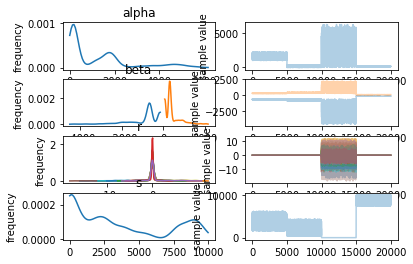

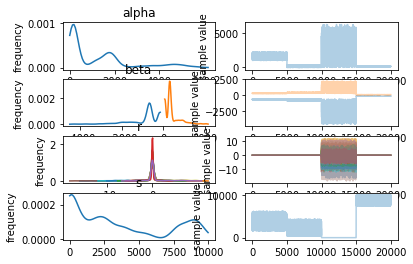

In [8]:
fit.plot()

In [12]:
samples = fit.extract(permuted=True)
alpha = np.mean(samples["alpha"])
beta = np.mean(samples["beta"])

In [13]:
samples

OrderedDict([('alpha',
              array([-82.22820262, -92.38969827, -83.37650134, ..., -90.50577089,
                     -81.99767927, -88.54256003])),
             ('beta',
              array([ 3.3617893 ,  3.5202511 ,  3.38053096, ...,  3.49791975,
                      3.36787773,  3.47229179])),
             ('sigma',
              array([ 1.88958229,  1.46308603,  1.4933092 , ...,  1.09260552,
                      1.5696753 ,  1.55110954])),
             ('lp__',
              array([-13.86421223, -13.0418492 , -13.16953399, ..., -14.2712301 ,
                     -12.93044326, -13.01552621]))])

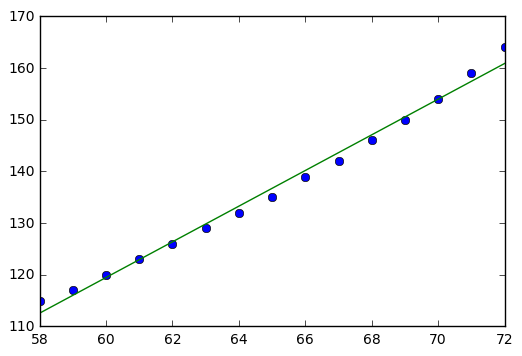

In [14]:
plt.plot(weights, heights, "o")
plt.plot(weights, alpha + beta * weights)
plt.show()